In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [91]:
data_folder = './processed_data_/'
data_file_path = os.path.join(data_folder, 'tesla_processed_dataset_2015_2025.parquet')

df = pd.read_parquet(data_file_path)

print(df.info())

print('\nRegions:', df['Region'].unique())
print('\nModels:', df['Model'].unique())
print("\nSource Types:", df['Source_Type'].unique())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2640 entries, 2023-05-01 to 2018-08-01
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Region                2640 non-null   category
 1   Model                 2640 non-null   category
 2   Estimated_Deliveries  2640 non-null   int64   
 3   Production_Units      2640 non-null   int64   
 4   Avg_Price_USD         2640 non-null   float64 
 5   Battery_Capacity_kWh  2640 non-null   int64   
 6   Range_km              2640 non-null   int64   
 7   CO2_Saved_tons        2640 non-null   float64 
 8   Source_Type           2640 non-null   category
 9   Charging_Stations     2640 non-null   int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 173.3 KB
None

Regions: ['Europe', 'Asia', 'North America', 'Middle East']
Categories (4, object): ['Asia', 'Europe', 'Middle East', 'North America']

Models: ['Model S', 'Model X', 'Model 3', 'M

Level 1 : Univariate analysis

In [92]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Estimated_Deliveries,2640.0,9922.199621,3935.950093,48.00,7292.000,9857.000,12510.2500,25704.00
Production_Units,2640.0,10655.847348,4260.600858,50.00,7828.250,10546.500,13469.0000,28939.00
Avg_Price_USD,2640.0,84907.340330,20123.258036,50003.70,67726.365,85058.510,102373.0425,119965.36
Battery_Capacity_kWh,2640.0,87.059470,20.836265,60.00,75.000,82.000,100.0000,120.00
Range_km,2640.0,500.257576,120.868549,330.00,418.000,470.000,586.2500,719.00
CO2_Saved_tons,2640.0,744.076989,353.221224,3.07,499.620,699.515,943.7650,2548.55
Charging_Stations,2640.0,8932.133712,3469.565883,3002.00,5897.750,8901.500,11938.0000,14996.00


In [93]:
df.describe(include='category').T

,count,unique,top,freq
Region,2640,4,Asia,660
Model,2640,5,Cybertruck,528
Source_Type,2640,3,Interpolated (Month),884


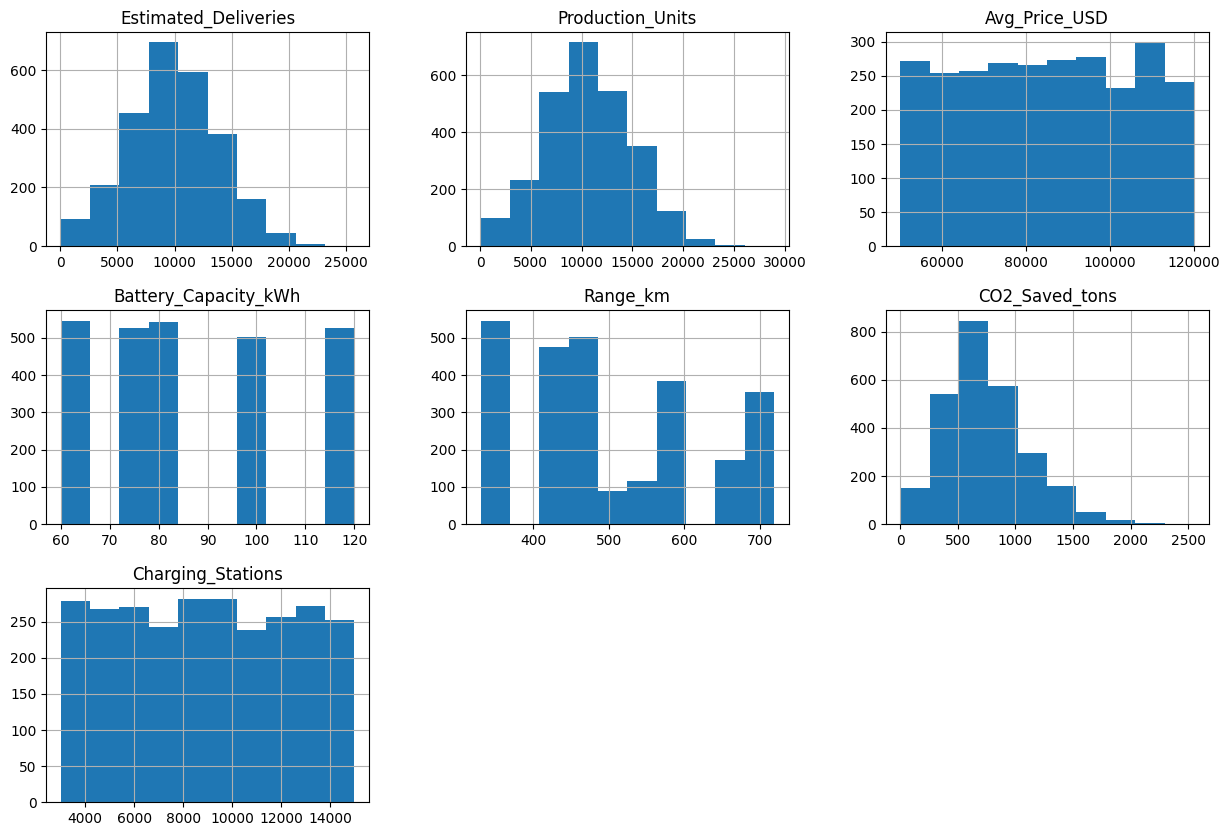

In [94]:
df.hist(figsize=(15, 10))
plt.show()

Level 2 : Bivariate analysis (Intersections)

<Axes: >

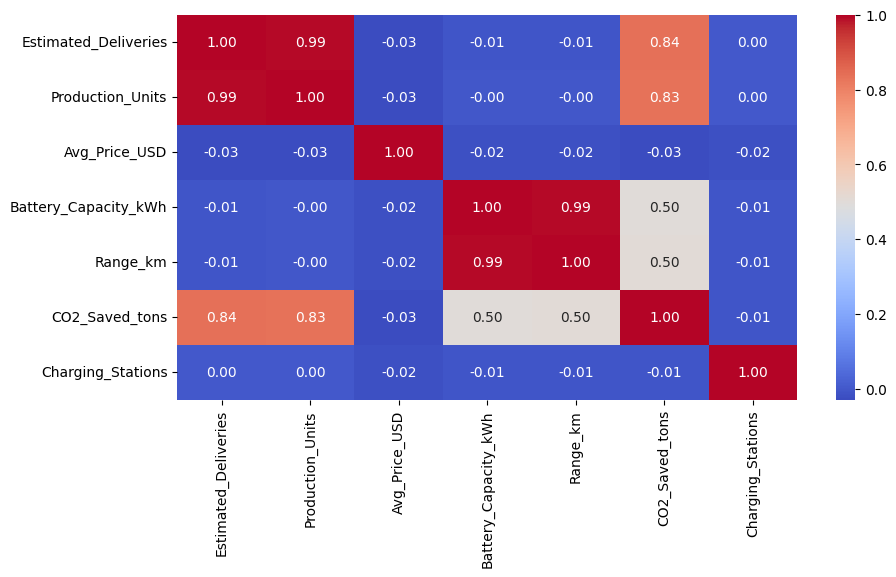

In [95]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt='.2f',cmap='coolwarm')

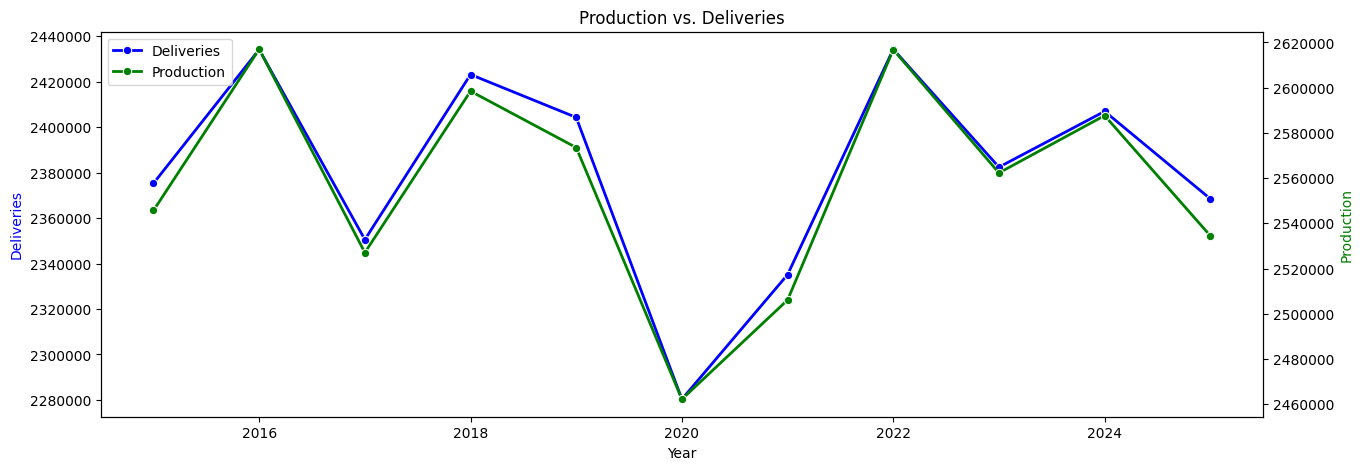

In [96]:
df['Year'] = df.index.year

fig, ax1 = plt.subplots(figsize = (15,5))

color1 = 'blue'
ax1.set_ylabel('Deliveries', color=color1)
sns.lineplot(
    data=df,
    x='Year',
    y='Estimated_Deliveries',
    estimator='sum',
    errorbar=None,
    ax=ax1,
    color=color1,
    label='Deliveries',
    linewidth=2,
    marker='o'
)
plt.ticklabel_format(style='plain')

ax2 = ax1.twinx()

color2 = 'green'
ax2.set_ylabel('Production', color=color2)
sns.lineplot(
    data=df,
    x='Year',
    y='Production_Units',
    estimator='sum',
    errorbar=None,
    ax=ax2,
    color=color2,
    label='Production',
    linewidth=2,
    marker='o'
)
plt.ticklabel_format(style='plain')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.get_legend().remove()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Production vs. Deliveries')
plt.ticklabel_format(style='plain')
plt.show()

C:\Users\Thiag\AppData\Local\Temp\ipykernel_2332\1669970913.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prod_region = df.groupby(['Year', 'Region'])['Production_Units'].sum().reset_index()


Text(0.5, 1.0, 'Production per Region')

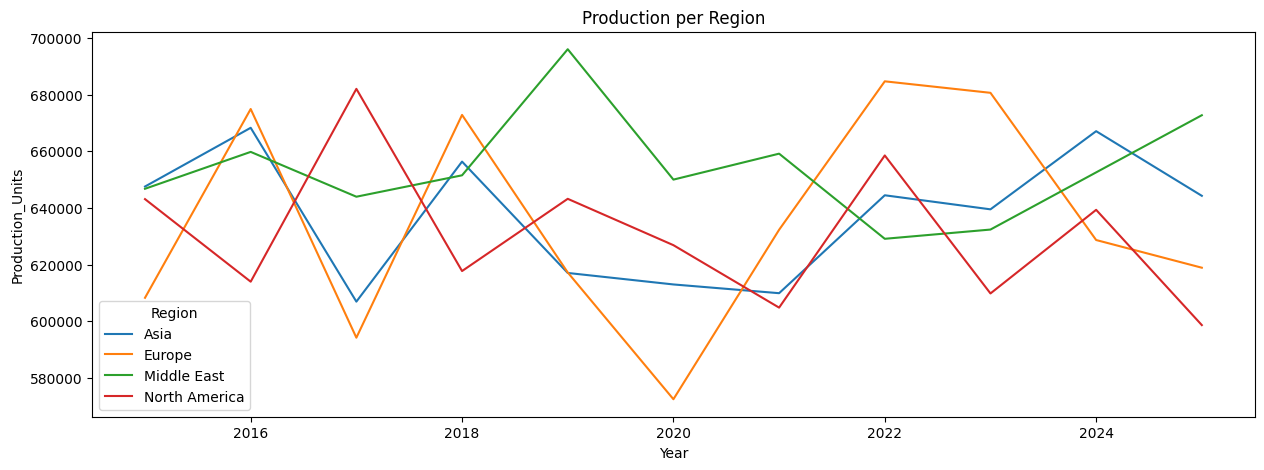

In [121]:
prod_region = df.groupby(['Year', 'Region'])['Production_Units'].sum().reset_index()

plt.figure(figsize=(15,5))
sns.lineplot(
    data=prod_region,
    x='Year',
    y='Production_Units',
    hue='Region'
)

plt.title('Production per Region')

Level 3 : Multivariate analysis (Deep insights)

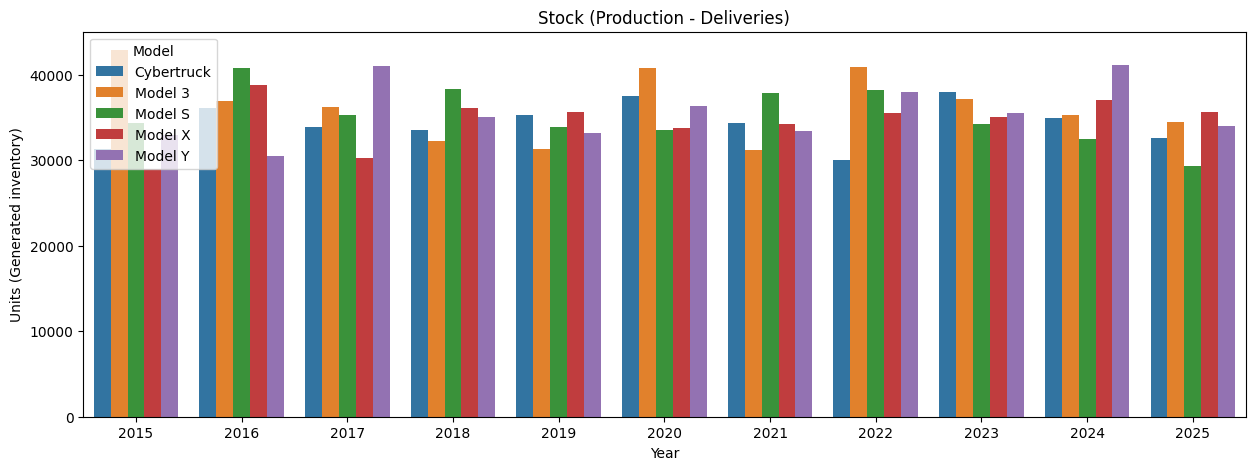

In [ ]:
df['production_gap'] = df['Production_Units'] - df['Estimated_Deliveries']

plt.figure(figsize=(15,5))
sns.barplot(
    data=df,
    x='Year',
    y='production_gap',
    hue='Model',
    estimator='sum',
    errorbar=None
)
plt.title('Stock (Production - Deliveries)')
plt.ylabel('Units (Generated inventory)')
plt.show()

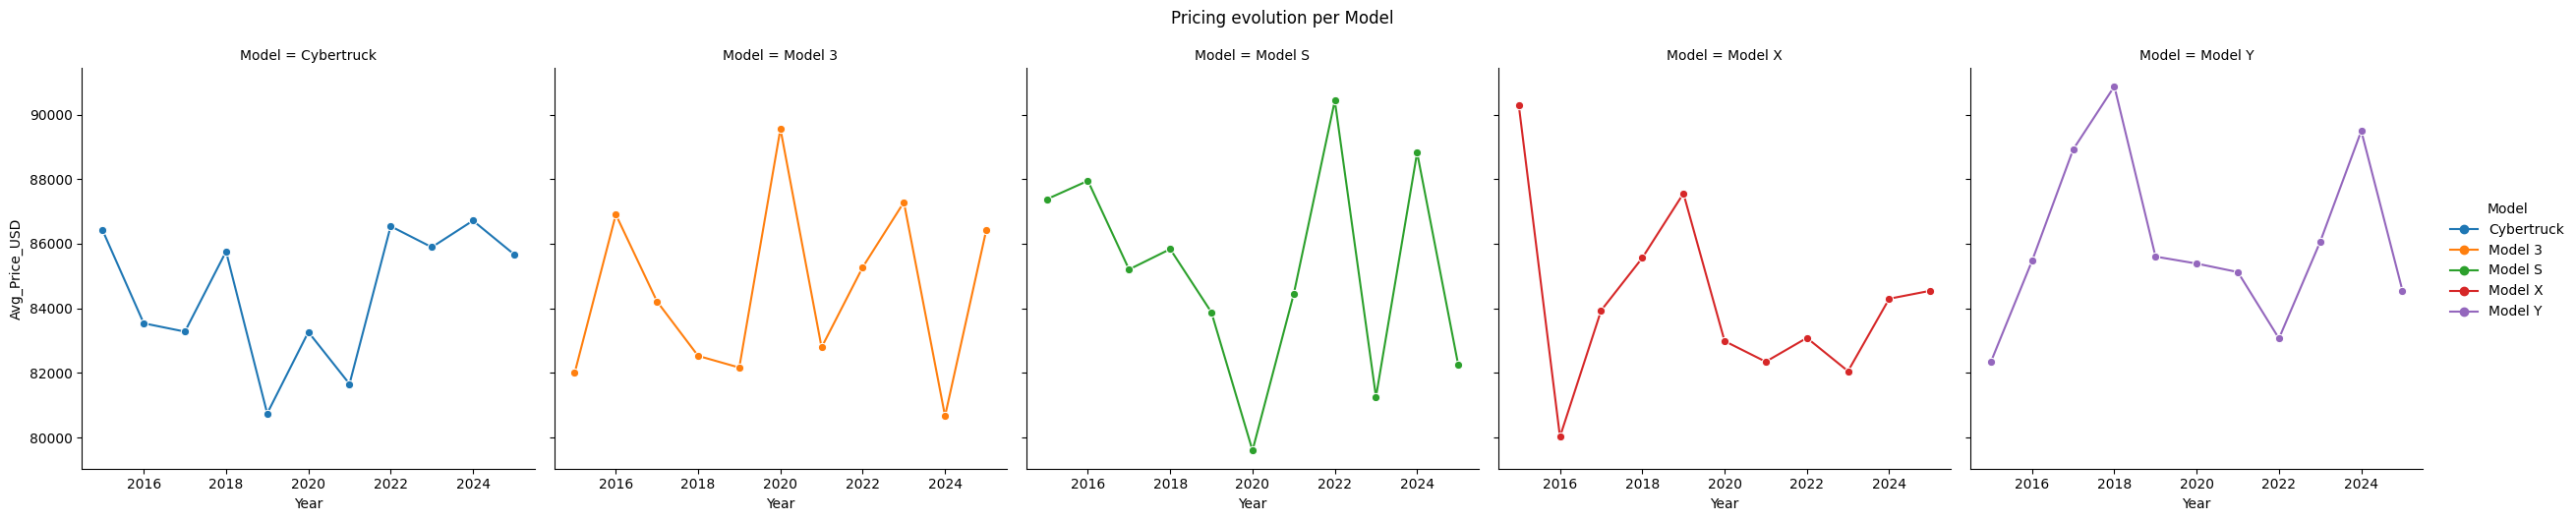

In [126]:
g = sns.relplot(
    data=df,
    x='Year',
    y='Avg_Price_USD',
    hue='Model',
    col='Model',
    kind='line',
    marker='o',
    errorbar=None
)
g.fig.suptitle('Pricing evolution per Model', y=1.05)
g.set_axis_labels('Year', 'Avg_Price_USD')
plt.show()

In [131]:
df.groupby('Model')['Avg_Price_USD'].mean().sort_values(ascending=False).to_frame()

C:\Users\Thiag\AppData\Local\Temp\ipykernel_2332\4241239192.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Model')['Avg_Price_USD'].mean().sort_values(ascending=False).to_frame()


,Avg_Price_USD
Model,
Model Y,86081.211061
Model S,85185.401269
Model 3,84528.004223
Cybertruck,84498.872159
Model X,84243.212936


Text(0.5, 1.0, 'Production per Model')

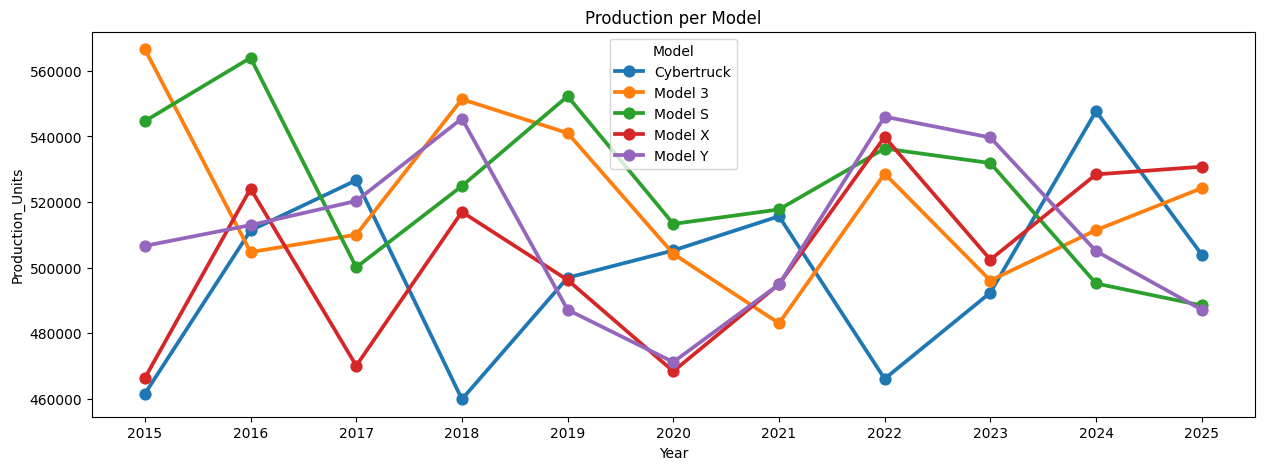

In [ ]:
plt.figure(figsize=(15, 5))
sns.pointplot(
    data=df,
    x='Year',
    y='Production_Units',
    hue='Model',
    estimator='sum',
    errorbar=None
)
plt.title('Production per Model')

C:\Users\Thiag\AppData\Local\Temp\ipykernel_2332\1240258799.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  model_sales = df.groupby('Model')['Estimated_Deliveries'].sum().sort_values(ascending=False).reset_index()


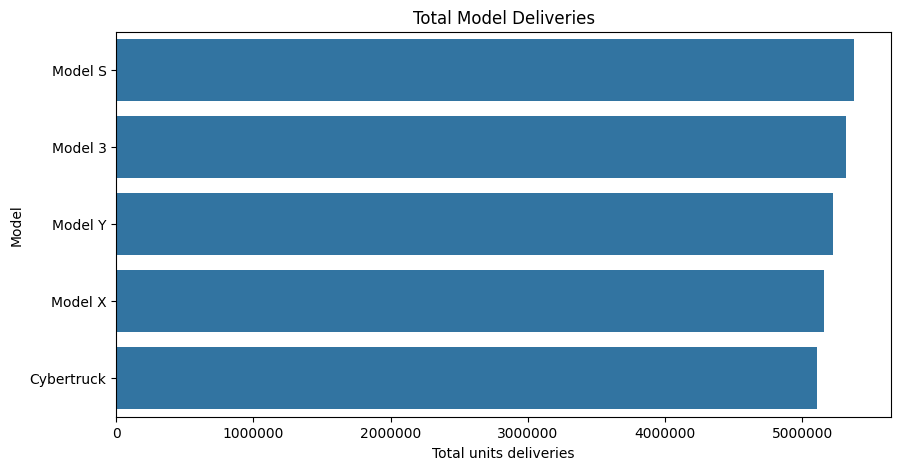

In [ ]:
model_sales = df.groupby('Model')['Estimated_Deliveries'].sum().sort_values(ascending=False).reset_index()

order_list = model_sales['Model']

plt.figure(figsize=(10,5))
sns.barplot(
    data=model_sales,
    x='Estimated_Deliveries',
    y='Model',
    order=order_list,
    estimator='sum'
)
plt.ticklabel_format(style='plain', axis='x')
plt.title('Total Model Deliveries')
plt.xlabel('Total units deliveries')
plt.ylabel('Model')
plt.show()


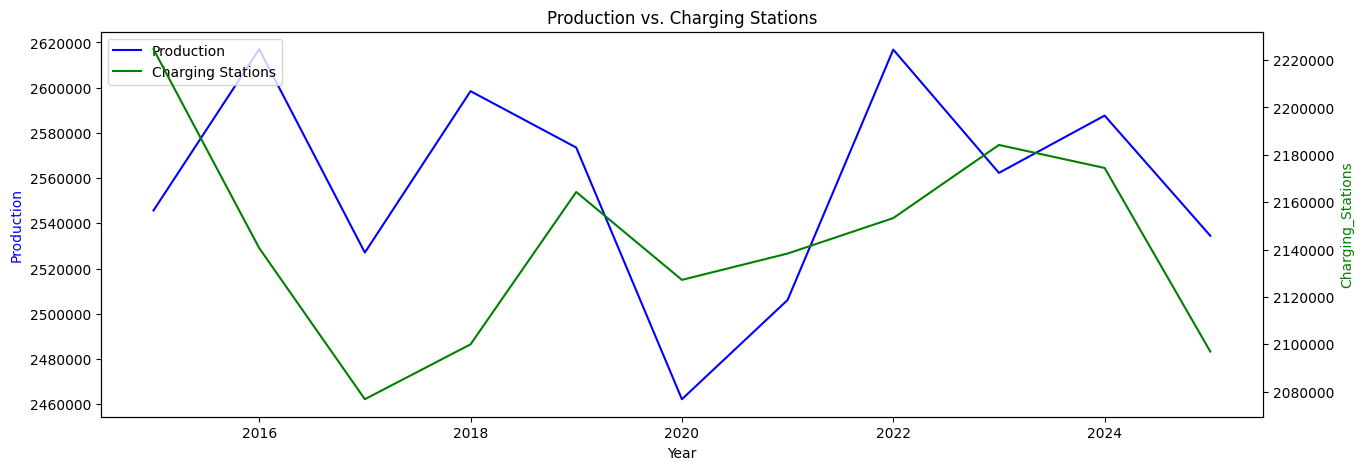

In [ ]:
fig, ax1 = plt.subplots(figsize=(15,5))

color1 = 'blue'
ax1.set_ylabel('Production', color=color1)
sns.lineplot(
    data=df,
    x='Year',
    y='Production_Units',
    estimator='sum',
    errorbar=None,
    ax=ax1,
    color=color1,
    label='Production'
)
plt.ticklabel_format(style='plain')

ax2 = ax1.twinx()

color2 = 'green'
ax2.set_ylabel('Charging_Stations', color=color2)
sns.lineplot(
    data=df,
    x='Year',
    y='Charging_Stations',
    estimator='sum',
    errorbar=None,
    ax=ax2,
    color=color2,
    label='Charging Stations'
)


lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.get_legend().remove()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.title('Production vs. Charging Stations')
plt.ticklabel_format(style='plain')
plt.show()

Key Findings of the Analysis (EDA)

## 1. Sales Insight: Focus on massive sales
    Can be explained by production being focused on the Model X, Tesla's cheaper model. In contrast, the lowest production is related to the Model Y, the more expensive model.
## 2. Operacional Insight: Logistic challenge
    The 'GAP' graph (Production - Deliveries) reveals that Tesla constantly produces more than it delivers. This suggests a logistic challenge or a sales bottleneck.
## 3. Strategic Insight: Ecossystm increase
    The dual-axis graph (Production vs Charging Stations) shows that Tesla is not only focusing on car production, but also expanding its charging network in parallel. This indicates a strong strategic focus on infrastructure to support its growth.